**Semestral Project**

- Picking a set of known biologically active structures, loading and processing it using RDkit
- Performing a basic analysis of the set, descriptors, scaffolds, fingerprints, similarities, etc.
- Comparing the properties of your picked set with other sets
- Trying out some standard cheminformatic methods on the sets
- Preparing set visualizations
-Making a basic classifier related to your picked and prepared dataset

As for my set of biologically active structures, I have chosen compounds associated with Progesterone receptor (Homo Sapiens). I have downloaded the set of these compounds in a csv format from CHEMBL. Firstly, I will load all necessary libraries (mainly RDKit)


In [96]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)
from rdkit.Chem import rdMolDescriptors as rdescriptors
import seaborn as sns
from rdkit.Chem import Descriptors
import csv
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import Lipinski

In [97]:
df = pd.read_csv("/Users/emafialova/cdd2025/DOWNLOAD-WTl0OYURRhsZVjmHtvPqC2eakuFMltzG5pT_VyAGucA=.csv", sep="\";\"")
df.head()

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_8041/3552242774.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/Users/emafialova/cdd2025/DOWNLOAD-WTl0OYURRhsZVjmHtvPqC2eakuFMltzG5pT_VyAGucA=.csv", sep="\";\"")


,"""ChEMBL ID",Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan,Records Key,"Records Name"""
0,"""CHEMBL48361",DABIGATRAN,BIBR 953 ZW|BIBR-953|BIBR-953-ZW|DABIGATRAN|PR...,Small molecule,3.0,471.52,88,164,2.99,150.22,...,-1.54,ZWITTERION,C25H25N7O3,Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)...,YBSJFWOBGCMAKL-UHFFFAOYSA-N,InChI=1S/C25H25N7O3/c1-31-20-10-7-17(25(35)32(...,False,0,"['Dabigatran', '24, Dabigatran', 'DABIGATRAN',...","['Dabigatran', '3-({2-[(4-Carbamimidoyl-phenyl..."
1,"""CHEMBL492",ETIDOCAINE,ETIDOCAINA|ETIDOCAINE|Etidocaine|W-19053|W-190...,Small molecule,4.0,276.42,69,88,3.75,32.34,...,-1.39,BASE,C17H28N2O,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,VTUSIVBDOCDNHS-UHFFFAOYSA-N,InChI=1S/C17H28N2O/c1-6-12-19(8-3)15(7-2)17(20...,False,0,"['35', 'Etidocaine', 'SID144206521', '26', 'Et...","['N-(2,6-Dimethyl-phenyl)-2-(ethyl-propyl-amin..."
2,"""CHEMBL878",METOLAZONE,DIULO|METAZOLINE|METENIX|METOLAZONA|METOLAZONE...,Small molecule,4.0,365.84,165,562,2.71,92.50,...,-1.18,NEUTRAL,C16H16ClN3O3S,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,AQCHWTWZEMGIFD-UHFFFAOYSA-N,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,False,0,"['Metolazone', 'Metolazone', 'Metolazone', 'NC...","['7-Chloro-2-methyl-4-oxo-3-o-tolyl-1,2,3,4-te..."
3,"""CHEMBL1371200",CANRENOATE POTASSIUM,CANRENOATE DE POTASSIUM|CANRENOATE POTASSIUM|C...,Small molecule,4.0,396.57,65,80,3.89,74.60,...,2.38,ACID,C22H29KO4,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,JTZQCHFUGHIPDF-RYVBEKKQSA-M,InChI=1S/C22H30O4.K/c1-20-9-5-15(23)13-14(20)3...,False,0,"['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA...","['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA..."
4,"""CHEMBL2354444",PIRARUBICIN,"ADRIAMYCIN, TETRAHYDROPYRANYL|PIRARUBICIN|PIRA...",Small molecule,3.0,627.64,58,130,1.55,204.30,...,1.51,BASE,C32H37NO12,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,KMSKQZKKOZQFFG-YXRRJAAWSA-N,InChI=1S/C32H37NO12/c1-14-31(45-21-8-3-4-9-42-...,False,0,"['PIRARUBICIN', 'THP (THP-Doxorubicin)', 'SID5...","['PIRARUBICIN', '10-[4-Amino-6-methyl-5-(tetra..."


a) Loading and processing my input set of compounds

In [24]:
with open('/Users/emafialova/cdd2025/DOWNLOAD-WTl0OYURRhsZVjmHtvPqC2eakuFMltzG5pT_VyAGucA=.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    pr_smiles = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

In [25]:
pr_smiles[:5]

In [57]:
len(pr_smiles)

4633

In [21]:
df_pr_smiles = df["Smiles"]
df_pr_smiles

0       Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)...
1                         CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
2            Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C
3       C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...
4       COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
                              ...                        
4628           CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1
4629    CCCCCCO[C@@H](C)c1cccc(-c2csc(NC(=O)c3cc(Cl)c(...
4630                             C[C@H]1CNCCc2ccc(Cl)cc21
4631    COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...
4632           COC(=O)Nc1nc2cc(C(=O)c3ccc(F)cc3)ccc2[nH]1
Name: Smiles, Length: 4633, dtype: object

In [79]:
df2 = df.fillna(-1)
# Filter rows where the "Smiles" column is NOT equal to -1
df_pr_smiles = df2[df2["Smiles"] != -1]
# Optional: check a specific row
df_pr_smiles

,"""ChEMBL ID",Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,Inchi,Withdrawn Flag,Orphan,Records Key,"Records Name"""
0,"""CHEMBL48361",DABIGATRAN,BIBR 953 ZW|BIBR-953|BIBR-953-ZW|DABIGATRAN|PR...,Small molecule,3.0,471.52,88,164,2.99,150.22,...,-1.54,ZWITTERION,C25H25N7O3,Cn1c(CNc2ccc(C(=N)N)cc2)nc2cc(C(=O)N(CCC(=O)O)...,YBSJFWOBGCMAKL-UHFFFAOYSA-N,InChI=1S/C25H25N7O3/c1-31-20-10-7-17(25(35)32(...,False,0,"['Dabigatran', '24, Dabigatran', 'DABIGATRAN',...","['Dabigatran', '3-({2-[(4-Carbamimidoyl-phenyl..."
1,"""CHEMBL492",ETIDOCAINE,ETIDOCAINA|ETIDOCAINE|Etidocaine|W-19053|W-190...,Small molecule,4.0,276.42,69,88,3.75,32.34,...,-1.39,BASE,C17H28N2O,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,VTUSIVBDOCDNHS-UHFFFAOYSA-N,InChI=1S/C17H28N2O/c1-6-12-19(8-3)15(7-2)17(20...,False,0,"['35', 'Etidocaine', 'SID144206521', '26', 'Et...","['N-(2,6-Dimethyl-phenyl)-2-(ethyl-propyl-amin..."
2,"""CHEMBL878",METOLAZONE,DIULO|METAZOLINE|METENIX|METOLAZONA|METOLAZONE...,Small molecule,4.0,365.84,165,562,2.71,92.50,...,-1.18,NEUTRAL,C16H16ClN3O3S,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,AQCHWTWZEMGIFD-UHFFFAOYSA-N,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,False,0,"['Metolazone', 'Metolazone', 'Metolazone', 'NC...","['7-Chloro-2-methyl-4-oxo-3-o-tolyl-1,2,3,4-te..."
3,"""CHEMBL1371200",CANRENOATE POTASSIUM,CANRENOATE DE POTASSIUM|CANRENOATE POTASSIUM|C...,Small molecule,4.0,396.57,65,80,3.89,74.60,...,2.38,ACID,C22H29KO4,C[C@]12CCC(=O)C=C1C=C[C@@H]1[C@@H]2CC[C@@]2(C)...,JTZQCHFUGHIPDF-RYVBEKKQSA-M,InChI=1S/C22H30O4.K/c1-20-9-5-15(23)13-14(20)3...,False,0,"['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA...","['CANRENOATE POTASSIUM', 'CANRENOIC ACID, POTA..."
4,"""CHEMBL2354444",PIRARUBICIN,"ADRIAMYCIN, TETRAHYDROPYRANYL|PIRARUBICIN|PIRA...",Small molecule,3.0,627.64,58,130,1.55,204.30,...,1.51,BASE,C32H37NO12,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,KMSKQZKKOZQFFG-YXRRJAAWSA-N,InChI=1S/C32H37NO12/c1-14-31(45-21-8-3-4-9-42-...,False,0,"['PIRARUBICIN', 'THP (THP-Doxorubicin)', 'SID5...","['PIRARUBICIN', '10-[4-Amino-6-methyl-5-(tetra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,"""CHEMBL9967",PIRENZEPINE,ACI-91|GASTRI P|GASTROZEPIN|PIRENZEPINA|PIRENZ...,Small molecule,4.0,351.41,78,344,1.56,68.78,...,-1.04,NEUTRAL,C19H21N5O2,CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1,RMHMFHUVIITRHF-UHFFFAOYSA-N,InChI=1S/C19H21N5O2/c1-22-9-11-23(12-10-22)13-...,False,0,"['1', 'pirenzepine', 'pirenzepine', 'Pirenzepi...","['11-[2-(4-Methyl-piperazin-1-yl)-acetyl]-5,11..."
4629,"""CHEMBL2107831",LUSUTROMBOPAG,LUSUTROMBOPAG|LUSUTROMBOPAG |MULPLETA|Mulpleo ...,Small molecule,4.0,591.56,35,42,8.52,97.75,...,-0.73,ACID,C29H32Cl2N2O5S,CCCCCCO[C@@H](C)c1cccc(-c2csc(NC(=O)c3cc(Cl)c(...,NOZIJMHMKORZBA-KJCUYJGMSA-N,InChI=1S/C29H32Cl2N2O5S/c1-5-6-7-8-12-38-18(3)...,False,0,"['LUSUTROMBOPAG', 'Lusutrombopag', 'LUSUTROMBO...","['LUSUTROMBOPAG', 'Lusutrombopag', 'LUSUTROMBO..."
4630,"""CHEMBL360328",LORCASERIN,LORCASERIN|LORCASERINA|LORCASERINE,Small molecule,4.0,195.69,60,232,2.59,12.03,...,-0.33,BASE,C11H14ClN,C[C@H]1CNCCc2ccc(Cl)cc21,XTTZERNUQAFMOF-QMMMGPOBSA-N,InChI=1S/C11H14ClN/c1-8-7-13-5-4-9-2-3-10(12)6...,True,0,"['(R)-15', '7', '7d (R), Lorcaserin, APD356', ...","['(R)-8-Chloro-1-methyl-2,3,4,5-tetrahydro-1H-..."
4631,"""CHEMBL23",DILTIAZEM,Cardizem|DILTIAZEM|DILTIAZEM EXTENDED RELEASE|...,Small molecule,4.0,414.53,254,2537,3.37,59.08,...,-0.13,NEUTRAL,C22H26N2O4S,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,HSUGRBWQSSZJOP-RTWAWAEBSA-N,InChI=1S/C22H26N2O4S/c1-15(25)28-20-21(16-9-11...,False,0,"['diltiazem', 'Diltiazem', 'diltiazem', 'Dilti...",['diltiazem;Acetic acid 5-(2-dimethylamino-eth...


In [82]:
df_smiles_list = [Chem.MolFromSmiles(smiles) for smiles in df_pr_smiles["Smiles"]]

In [83]:
df_smiles_list

 ...]

b) Performing a basic analysis of the set
- descriptors
- scaffolds
- similarities
- fingerprints

In [84]:
def get_descriptors(smiles_list):
    mw = [rdescriptors.CalcExactMolWt(mol) for mol in smiles_list]
    HA = [Lipinski.NumHAcceptors(mol) for mol in smiles_list]
    HD = [Lipinski.NumHDonors(mol) for mol in smiles_list]
    log_P = [Chem.Crippen.MolLogP(mol) for mol in smiles_list]
    atoms = [rdescriptors.CalcNumHeavyAtoms(mol) for mol in smiles_list]
    rings = [rdescriptors.CalcNumRings(mol) for mol in smiles_list]
    return mw, HA, HD, log_P, atoms, rings


In [85]:
#df_smiles_list = list(Chem.MolFromSmiles(smiles) for smiles in df_pr_smiles)
pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings = get_descriptors(df_smiles_list)

In [26]:
pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings = get_descriptors(pr_smiles)
print(pr_mw)

[471.20188766, 276.220163516, 365.060090052, 396.17029108799994, 627.2315756239999, 221.10519334, 279.158291532, 524.172305508, 455.23078777599994, 575.209006776, 290.2245802, 310.193280072, 582.2478348079999, 443.170119168, 149.12044948, 364.240230264, 0.0, 281.080041212, 303.101919528, 242.07097202, 313.167793596, 447.14803246400004, 354.2406241879999, 456.1046148819999, 411.18458653199997, 232.121177752, 410.2027992, 201.078978592, 385.981417076, 1055.43170652, 151.099714036, 341.14092721599997, 217.11027872, 430.98349660799994, 788.8541086639999, 290.079038168, 258.30240205618, 273.022641924, 345.149556688, 502.33370218417997, 789.487455952, 396.26644501199996, 287.152143532, 470.17139605599994, 404.23112212399997, 354.2406241879999, 282.24275568409, 494.22353015199985, 344.23514488399996, 348.208930136, 137.07093932809, 384.230059504, 338.210661452, 203.094628656, 300.245315644, 679.4057324160001, 176.058577496, 529.3999845960899, 385.13477921599997, 290.163042564, 454.00600588, 5

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_8041/2822618771.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot([pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_mw", "pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])


[[Text(0, 0, 'pr_mw'),
  Text(1, 0, 'pr_HA'),
  Text(2, 0, 'pr_HD'),
  Text(3, 0, 'pr_logP'),
  Text(4, 0, 'pr_atoms'),
  Text(5, 0, 'pr_rings')]]

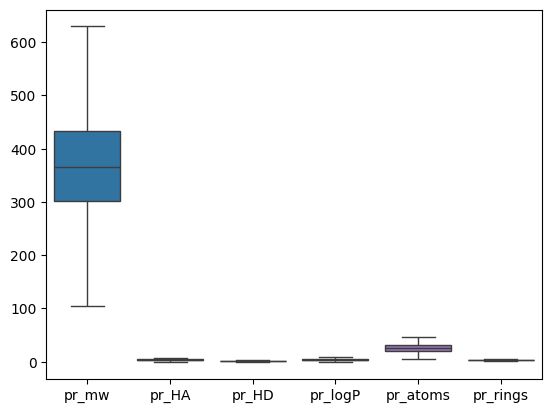

In [86]:
sns.boxplot([pr_mw, pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_mw", "pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])

This probably isn't a practical visualization as the molecular weights of all molecules are above 100 and all other descriptors are much lower.

For better visualization, I will remove this one boxplot.

/var/folders/vs/jvlkzzgs5qng_qg2lf5q2zwr0000gn/T/ipykernel_8041/1946346267.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot([pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])


[[Text(0, 0, 'pr_HA'),
  Text(1, 0, 'pr_HD'),
  Text(2, 0, 'pr_logP'),
  Text(3, 0, 'pr_atoms'),
  Text(4, 0, 'pr_rings')]]

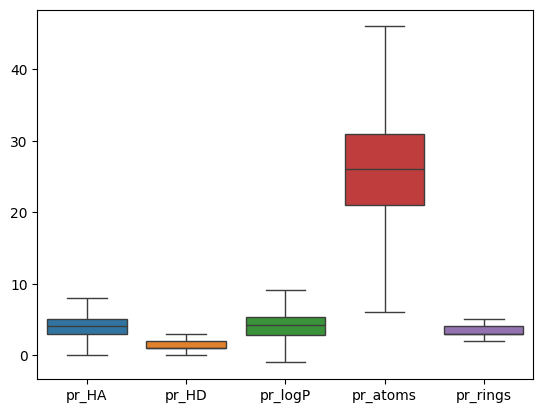

In [87]:
sns.boxplot([pr_HA, pr_HD, pr_logP, pr_atoms, pr_rings], showfliers = False).set(xticklabels = ["pr_HA", "pr_HD", "pr_logP", "pr_atoms", "pr_rings"])

I think it would be also nice to see the descriptors of theis set compared to descriptors of another set. For the comparison, I will choose two sets that we have previously worked with: drugbank.sdf and mtor set.

In [88]:
db = [mol for mol in Chem.SDMolSupplier("/Users/emafialova/cdd2025/data/drugbank.sdf") if mol]

In [89]:
df_mtor = pd.read_csv("/Users/emafialova/cdd2025/data/chembl_mtor_ic50.csv", sep=";")
df_mtor = df_mtor["Smiles"]
mtor = list(Chem.MolFromSmiles(smiles) for smiles in df_mtor)

In [91]:
db_mw, db_HA, db_HD, db_logP, db_atoms, db_rings = get_descriptors(db)
mtor_mw, mtor_HA, mtor_HD, mtor_logP, mtor_atoms, mtor_rings = get_descriptors(mtor)

In [94]:
desc_names = ['ExactMolWt', 'HAcceptors', 'HDonors', 'LogP', 'HeavyAtoms', 'Rings']
sets = {'PR': df_smiles_list, 'MTOR': mtor, 'DrugBank': db}
sets2 = {'PR': df_smiles_list, 'MTOR': mtor}
# Create long-format DataFrame
all_data = []
all_data2 = []

for label, smiles in sets2.items():
    descriptors = get_descriptors(smiles)
    for name, values in zip(desc_names, descriptors):
        for val in values:
            all_data2.append({
                'Descriptor': name,
                'Value': val,
                'Dataset': label
            })

In [95]:
import matplotlib.pyplot as plt

df = pd.DataFrame(all_data)

# Set style
sns.set(style="whitegrid")

# Create the FacetGrid with 2 columns
g = sns.catplot(
    data=df, 
    x='Dataset', 
    y='Value', 
    hue='Dataset',
    col='Descriptor', 
    kind='box', 
    col_wrap=3, 
    palette='Set2', 
    sharey=False
)

g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Dataset` for `x`. An entry with this name does not appear in `data`.

It seems like the sets are descriptors are in general quite similar but in all cases, the drugbank set has a lot of outliers. I also want to visualize just Mtor and my chosen dataset:

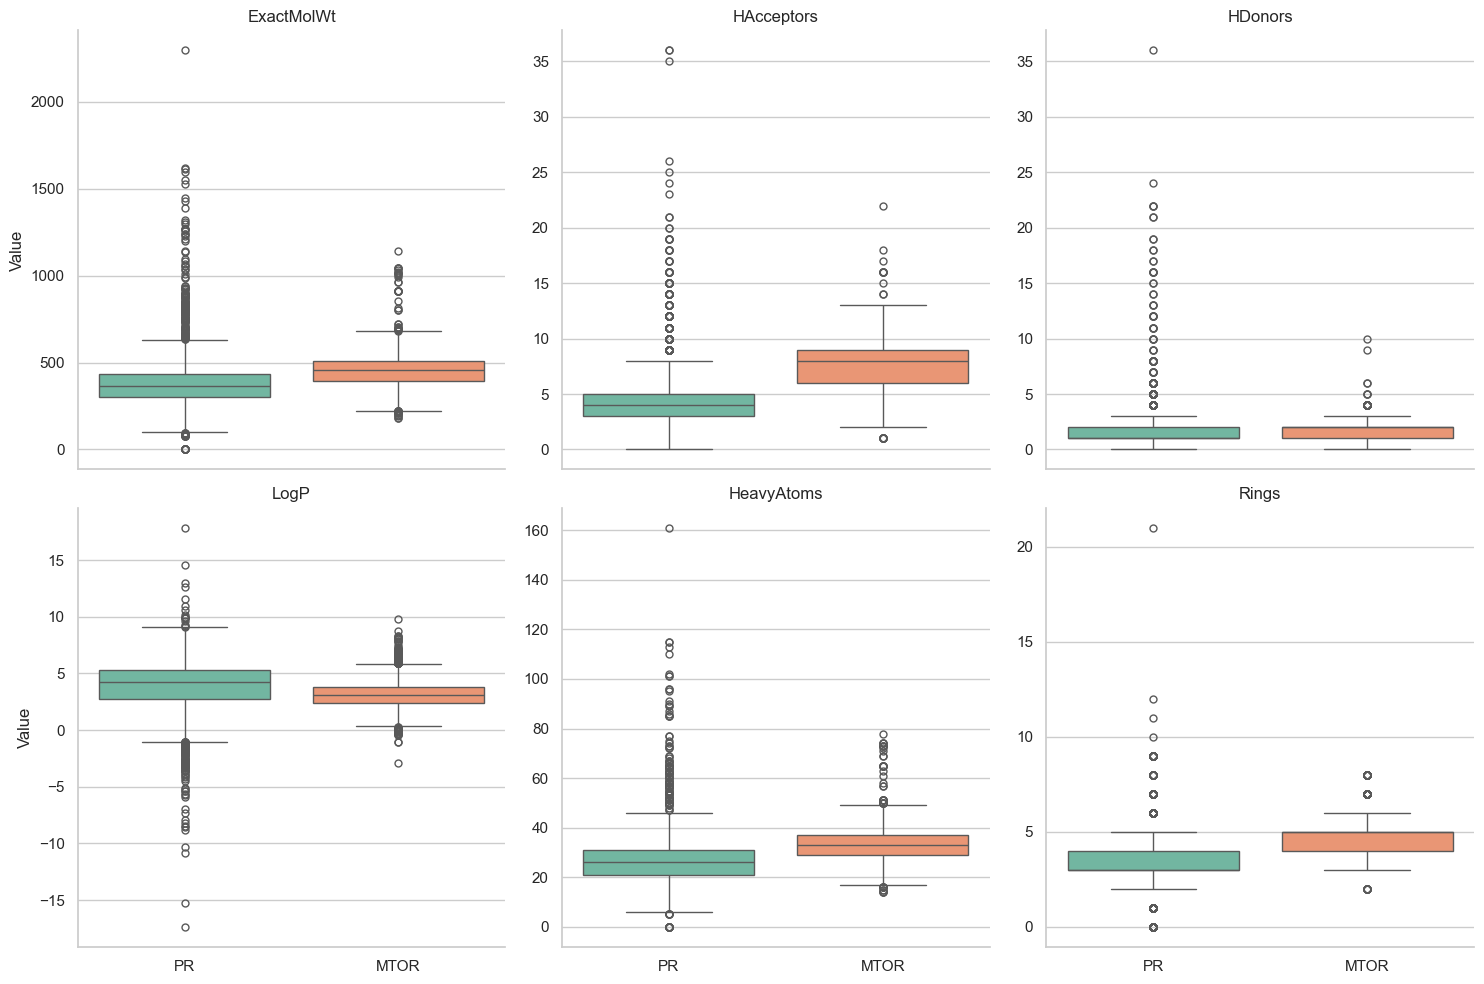

In [37]:
df2 = pd.DataFrame(all_data2)

# Set style
sns.set(style="whitegrid")

# Create the FacetGrid with 2 columns
g = sns.catplot(
    data=df2, 
    x='Dataset', 
    y='Value', 
    hue='Dataset',
    col='Descriptor', 
    kind='box', 
    col_wrap=3, 
    palette='Set2', 
    sharey=False
)

g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
plt.tight_layout()
plt.show()

I think its safe to say that mtor dataset and my dataset are very similar.

Now for the scaffolds:

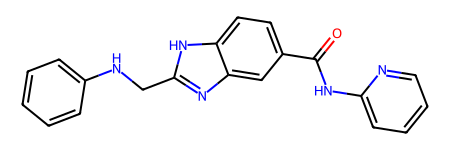

In [41]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(pr_smiles[0])
scaffold1

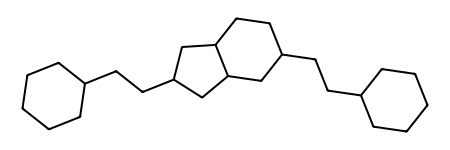

In [42]:
def get_scaffold(input_molecule):
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(input_molecule) # all atoms->C all bonds-> single
    except ValueError: 
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
get_scaffold(pr_smiles[0])

In [43]:
pr_scaffolds = [get_scaffold(mol) for mol in pr_smiles]
pr_scaffolds[:5]

In [44]:
pr_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(pr_scaffolds) if mol]
pr_scaffolds_smiles[:5]

[(0, 'C1CCC(CCC2CCC3CC(CCC4CCCCC4)CC3C2)CC1'),
 (1, 'C1CCCCC1'),
 (2, 'C1CCC(C2CCC3CCCCC3C2)CC1'),
 (3, 'C1CCC2C(C1)CCC1C3CCCC3CCC21'),
 (4, 'C1CCC(CC2CCC(CC3CCCC4CC5CC6CCCCC6CC5CC34)CC2)CC1')]

In [46]:
from collections import defaultdict
pr_scaffolds_dict = defaultdict(list)
for i, scaffold in pr_scaffolds_smiles:
    pr_scaffolds_dict[scaffold].append(i)
print(pr_scaffolds_dict)

defaultdict(<class 'list'>, {'C1CCC(CCC2CCC3CC(CCC4CCCCC4)CC3C2)CC1': [0, 3468], 'C1CCCCC1': [1, 14, 19, 30, 50, 65, 74, 77, 79, 81, 83, 92, 93, 99, 102, 111, 125, 129, 130, 137, 138, 142, 167, 181, 187, 201, 214, 218, 226, 235, 240, 241, 247, 251, 252, 259, 302, 401, 475, 573, 712, 730, 809, 907, 932, 960, 1195, 1305, 1339, 1437, 1438, 1460, 1499, 1542, 1564, 1756, 1791, 1980, 2113, 2191, 2362, 2502, 2546, 2667, 2676, 2689, 2695, 2696, 2706, 2707, 2719, 2739, 2748, 2750, 2765, 2768, 2770, 2777, 2817, 2829, 2879, 3008, 3010, 3011, 3012, 3016, 3034, 3058, 3066, 3074, 3078, 3083, 3117, 3121, 3130, 3140, 3154, 3156, 3158, 3160, 3166, 3168, 3176, 3179, 3226, 3228, 3235, 3237, 3241, 3243, 3245, 3261, 3471, 3479, 3483, 3492, 3498, 3499, 3514, 3519, 3524, 3525, 3533, 3547, 3555, 3560, 3565, 3577, 3583, 3607, 3623, 3630, 3642, 3648, 3666, 3676, 3681, 3697, 3704, 3709, 3716, 3721, 3725, 3726, 3730, 3735, 3737, 3741, 3761, 3783, 3790, 3807, 3809, 3810, 3818, 3819, 3823, 3860, 3872, 3876, 3877, 3

In [47]:
mtor_scaffolds = [get_scaffold(mol) for mol in mtor]
mtor_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(mtor_scaffolds) if mol]
mtor_scaffolds_dict = defaultdict(list)
for i, scaffold in mtor_scaffolds_smiles:
    mtor_scaffolds_dict[scaffold].append(i)
print(mtor_scaffolds_dict)

defaultdict(<class 'list'>, {'C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1': [0, 1, 2, 3, 4, 5, 6, 25, 26, 30, 91, 92, 93, 94, 95, 96, 306, 307, 426, 428, 493, 549, 602, 604, 607, 833, 834, 927, 933, 945, 946, 978, 1143, 1158, 1181, 1198, 1220, 1245, 1247, 1248, 1249, 1250, 1266, 1328, 1329, 1351, 1352, 1353, 1354, 1356, 1378, 1387, 1388, 1389, 1508, 1513, 1515, 1516, 1583], 'C1CCC(C2CCC3CCC(C4CCCCC4)C3C2)CC1': [7, 777, 1066, 1072, 1397, 1772, 1774, 2166, 2171, 2174, 2497, 3480, 3481, 3996], 'C1CCC(CC2CCC3CCC(C4CCCCC4)CC32)CC1': [8, 125, 412, 413, 415, 472, 848, 907, 917, 918, 950, 1077, 1394, 1395, 1396, 1398, 1399, 1729, 2165, 2592, 2593, 3179], 'C1CCC(CC2CCC3CCC(C4CCC5CCCC5C4)CC32)CC1': [9, 10, 124, 127, 128, 471, 473, 474, 530, 532, 533, 776, 915, 919, 1901, 1902, 2167, 2615], 'C1CCC2C(C1)CCC1C3CCCC3CCC21': [11, 187, 190, 191, 192, 193, 383, 388, 389, 521, 631, 632, 633, 1080, 1085, 1437, 1618, 1619, 1620, 1621, 1641, 1645], 'C1CCC(C2CCC(C3CCCC4CCC5CCC(C6CCC7CCCCC7C6)CC5C43)CC2)CC1': [12, 1

In [48]:
pr_scaffolds_sorted = [(scaffold, len(ligands)) for scaffold, ligands in pr_scaffolds_dict.items()]
pr_scaffolds_sorted.sort(key=lambda x: x[1], reverse=True)

In [49]:
mtor_scaffolds_sorted = [(scaffold, len(ligands)) for scaffold, ligands in mtor_scaffolds_dict.items()]
mtor_scaffolds_sorted.sort(key=lambda x: x[1], reverse=True)

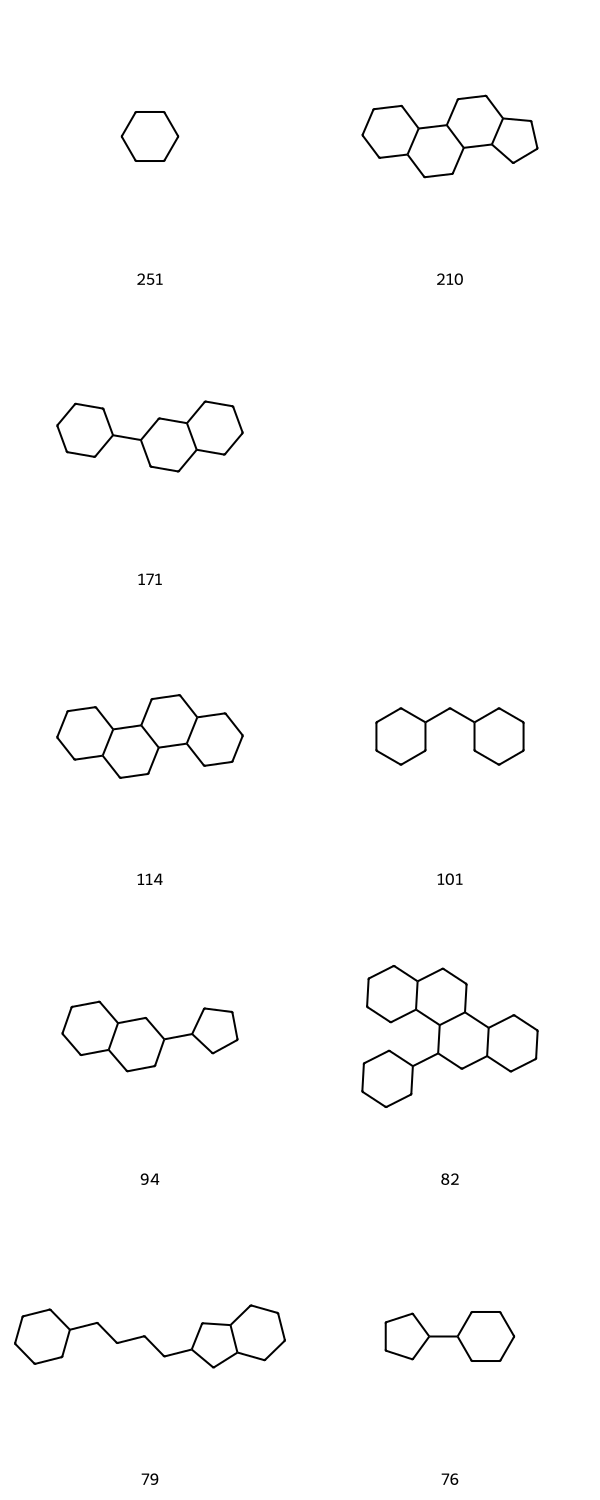

In [50]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in pr_scaffolds_sorted[:10]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in pr_scaffolds_sorted[:10]])

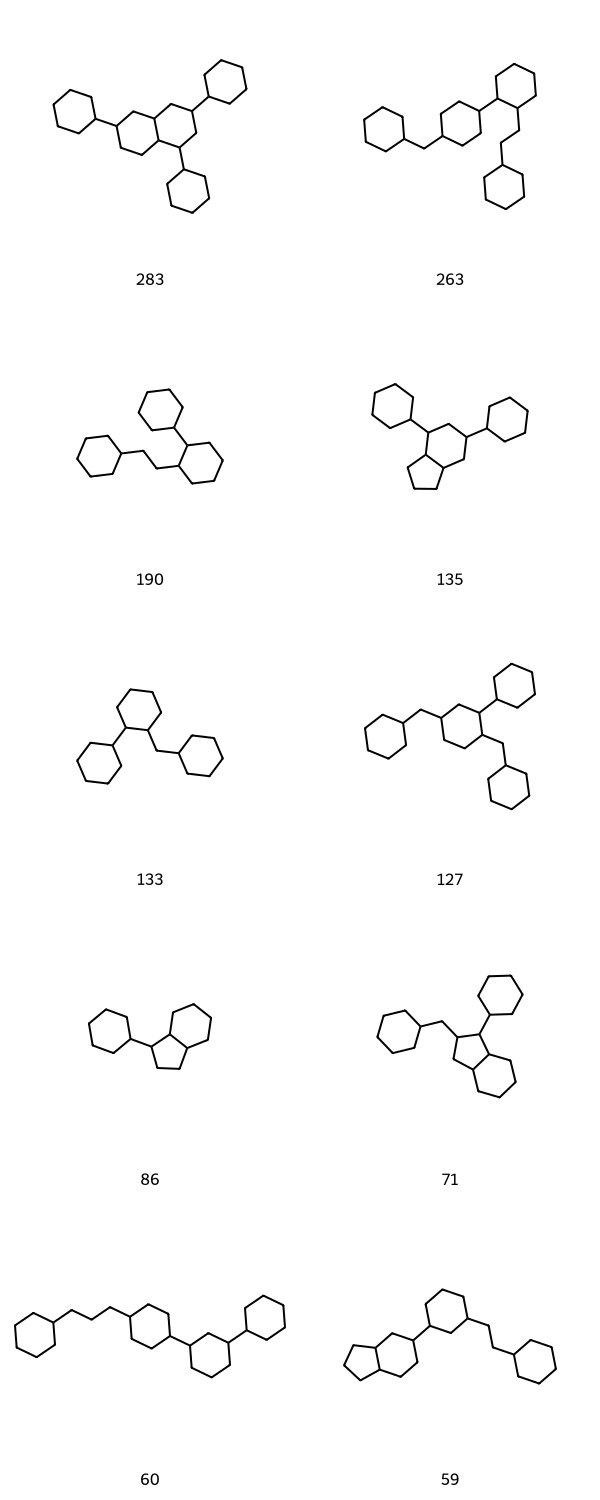

In [51]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in mtor_scaffolds_sorted[:10]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in mtor_scaffolds_sorted[:10]])

From the visualization nof top 10 most common scaffolds in my dataset and the mtor dataset, I think its quite clear that the molecules in my dataset are a bit simpler. The presence of some steroid core is also quite frequent. 

Now I want to calculate the fingerprints of all molecules in both sets and then comapre them and see if they are similar. To assess similarity, I will be using the Tanimoto similarity measure with the threshold of 0.8 and radius of 2.

In [52]:
fpgen = AllChem.GetMorganGenerator(radius=2)
pr_fps = [fpgen.GetFingerprint(mol) for mol in pr_smiles]
mtor_fps = [fpgen.GetFingerprint(mol) for mol in mtor]

In [53]:
def similarity_search(fp, fps, threshold = 0.8):
    similar = []
    for index, i in enumerate(fps):
        similarity = DataStructs.TanimotoSimilarity(fp, i)
        if similarity >= threshold:
            similar.append(index)
    return similar

In [54]:
similar_mols = [(index, similarity_search(pr_mol, mtor_fps)) for index, pr_mol in enumerate(pr_fps)]

In [56]:
relevant = [(m,ds) for m,ds in similar_mols if len(ds)]
print(len(relevant))

12


So it seems like there are 12 similar compounds between these two sets based on the Tanimoto similarity and fingerprint of radius 2. Let's look at them:

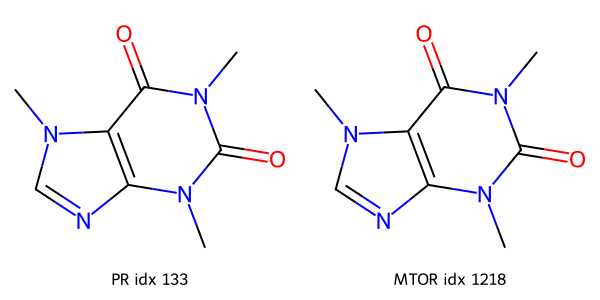

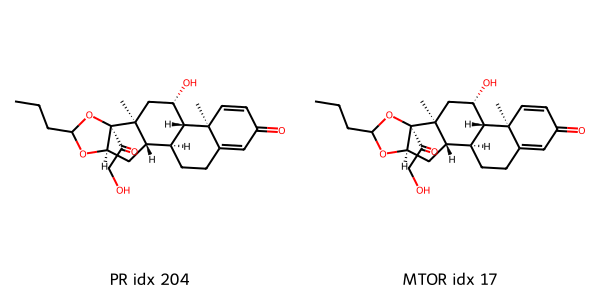

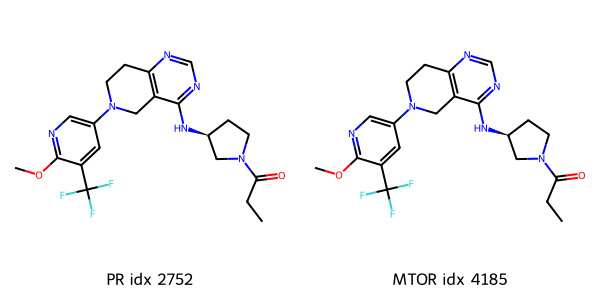

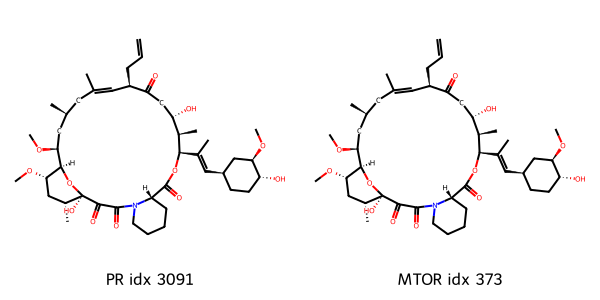

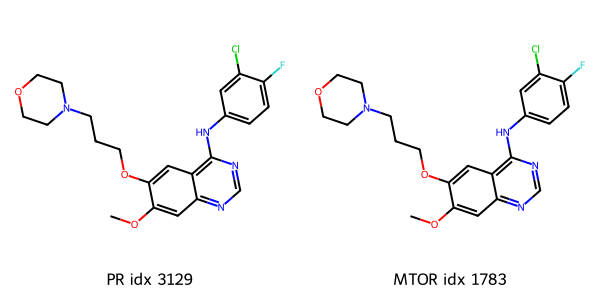

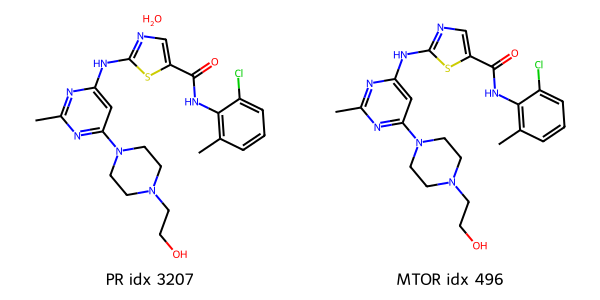

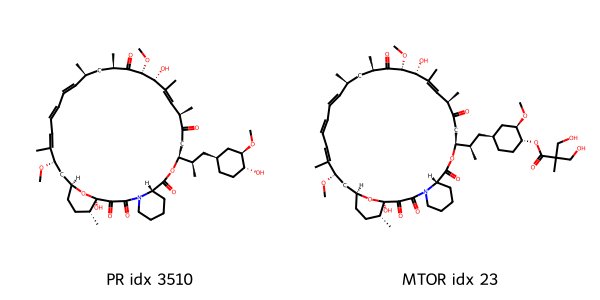

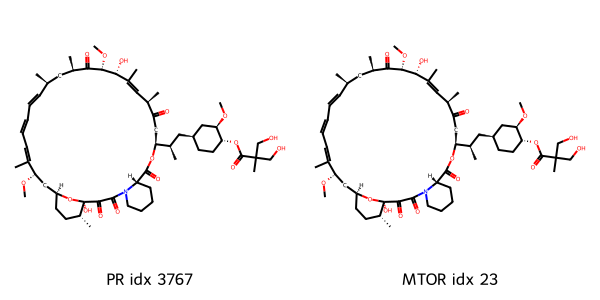

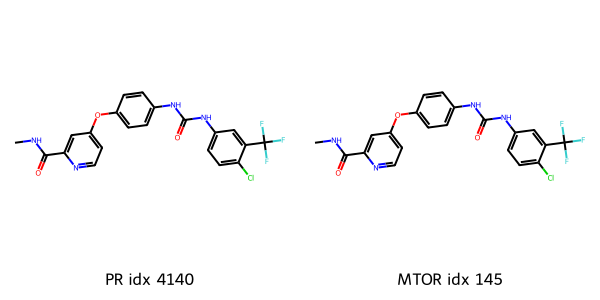

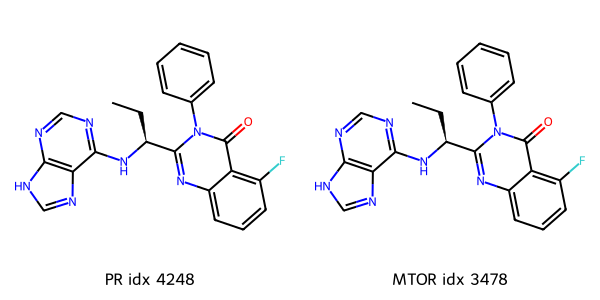

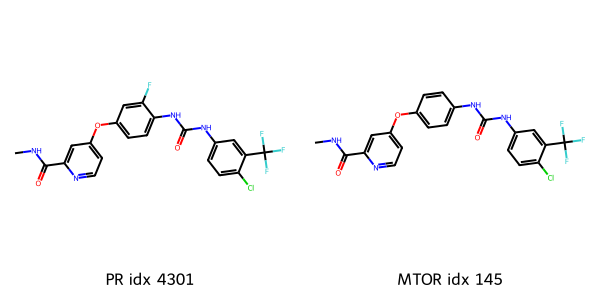

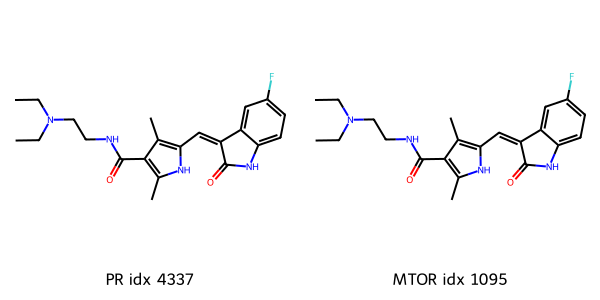

In [67]:
from rdkit.Chem.Draw import rdMolDraw2D

def show_similar_pairs(pr_mols, mtor_mols, relevant):
    pair_images = []

    for pr_idx, similar_list in relevant:
        pr_mol = pr_mols[pr_idx]
        for i, mtor_idx in enumerate(similar_list):
            if i < 1:
                mtor_mol = mtor_mols[mtor_idx]
                legends = [f'PR idx {pr_idx}', f'MTOR idx {mtor_idx}']
                img = Draw.MolsToGridImage([pr_mol, mtor_mol], molsPerRow=2, subImgSize=(300,300), legends=legends, useSVG=False)
                pair_images.append(img)

    # Display all images in Jupyter-like environments
    from IPython.display import display
    for img in pair_images:
        display(img)

show_similar_pairs(pr_smiles, mtor, relevant)

Let's now move into visualization of these two datasets. I will be using three popular chemoinforatic methods:
- PCA
- MDS
- tSNE

In [76]:
from sklearn import decomposition
from rdkit.Chem import rdMolDescriptors
mqn_data = []
for mol in pr_smiles:
    mqn = rdMolDescriptors.MQNs_(mol)
    mqn_data.append(mqn + ['pr'])

for mol in mtor:
    mqn = rdMolDescriptors.MQNs_(mol)
    mqn_data.append(mqn + ['mtor'])

# Create DataFrame
mqn_columns = [f"MQN_{x}" for x in range(1, 43)]
df = pd.DataFrame(mqn_data, columns=mqn_columns + ['source'])

# Run PCA
pca = decomposition.PCA(n_components=2)  # Just keep 2 components for plotting
components = pca.fit_transform(df[mqn_columns])
df[['PCA_1', 'PCA_2']] = components


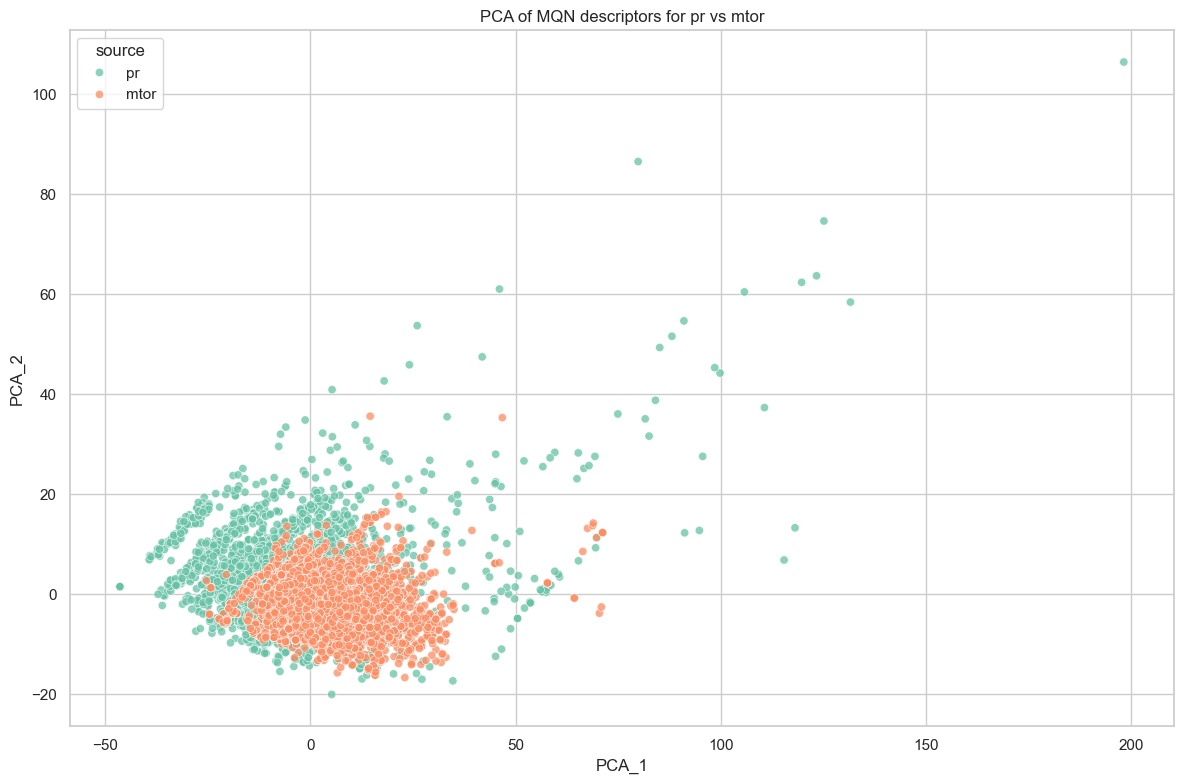

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(
    x="PCA_1", y="PCA_2",
    data=df,
    hue="source",
    palette="Set2",
    alpha=0.75,
    ax=ax
)
ax.set_title("PCA of MQN descriptors for pr vs mtor")
plt.tight_layout()
plt.show()

MDS

t-SNE

In [ ]:
for m in df:
    m["fps"] = Chem.GetMorganFingerprintAsBitVect(df["rdmol"],2,nBits=1024)

In [81]:
from sklearn import manifold
from scipy.spatial import distance

sparse_mat = distance.pdist(list(df["fps"]),metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

clf = manifold.TSNE(n_components=2, metric="precomputed", init="random")
X_tsne = clf.fit_transform(dist_mat)

df = df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))

KeyError: 'fps'

ValueError: Could not interpret value `tsne_x` for `x`. An entry with this name does not appear in `data`.

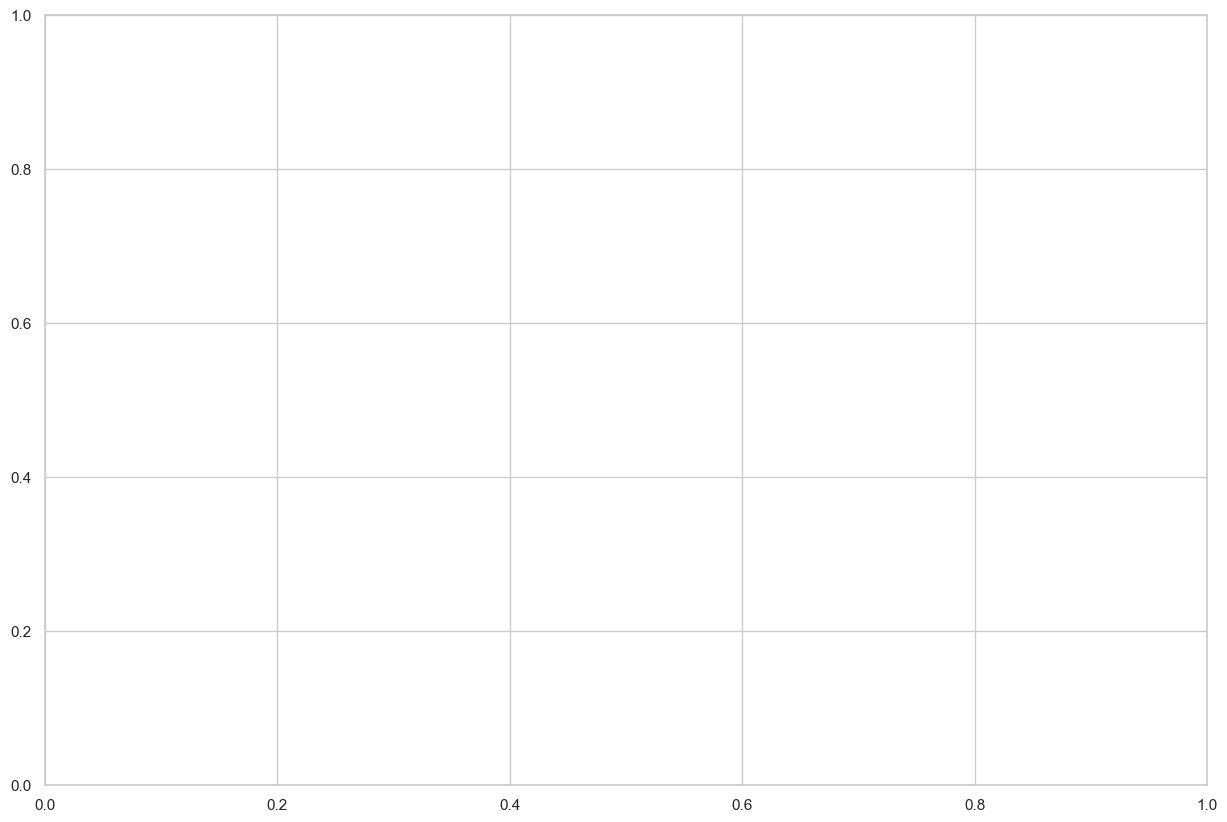

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="tsne_x",
                      y="tsne_y",
                      data=df,
                      hue="source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

And lastly some classification. I will be using a Random Forest classifier and a Gaussian classifier.

I will firstly split the data into train, validation and test. Train the model (RF), find the best hyperparameters and then show the confusion matrix.

I will also give out the expected error on test data.